<a href="https://colab.research.google.com/github/r2x4/machine_alura_oracle/blob/main/analisi_datos_IA/datos_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#af7ac5'>**IA aumentada: Prevision de atrasos de Vuelos**</h1>

In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick

In [2]:
print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [3]:
datos = pd.read_csv('/content/flights.csv')

In [4]:
datos.sample(7)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
17759,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,88,2013,False,0.332193
55743,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,66,2020,False,-23.360883
29051,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,111,2015,True,61.538439
47695,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,259,2018,False,8.574266
8352,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,191,2011,True,7.358899
778,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,51,2010,False,-8.392554
18000,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,105,2013,False,12.734751


In [5]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [6]:
# metadatos osea datos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [7]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [8]:
# variables categoricas
datos.describe(include='object')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [9]:
datos.isnull().sum()

,0
flight_id,0
airline,0
aircraft_type,0
schengen,0
origin,0
arrival_time,0
departure_time,0
day,0
year,0
is_holiday,0


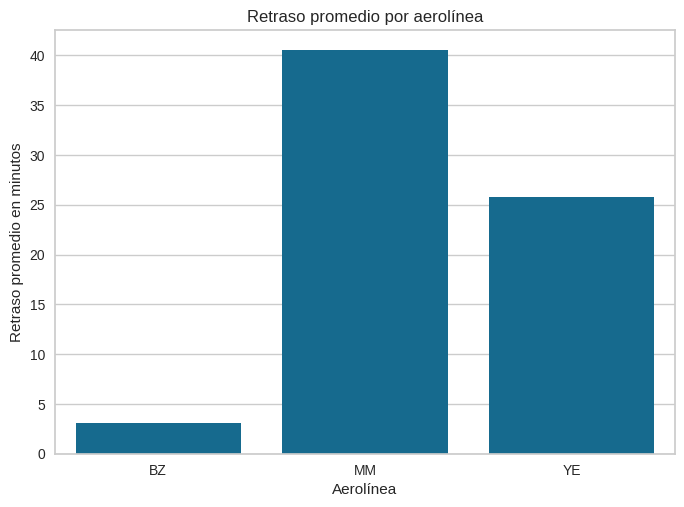

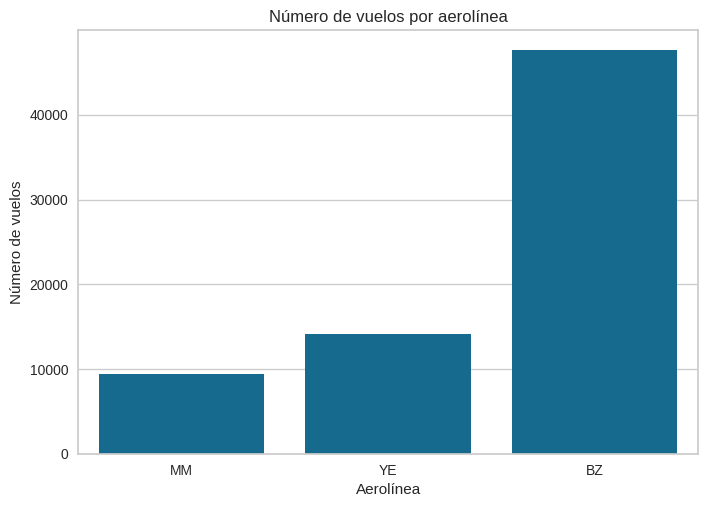

In [10]:
# graficos de vuelos

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Retraso promedio por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

# vamos aver por aerolineas
sns.countplot(x='airline', data=datos)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.show()

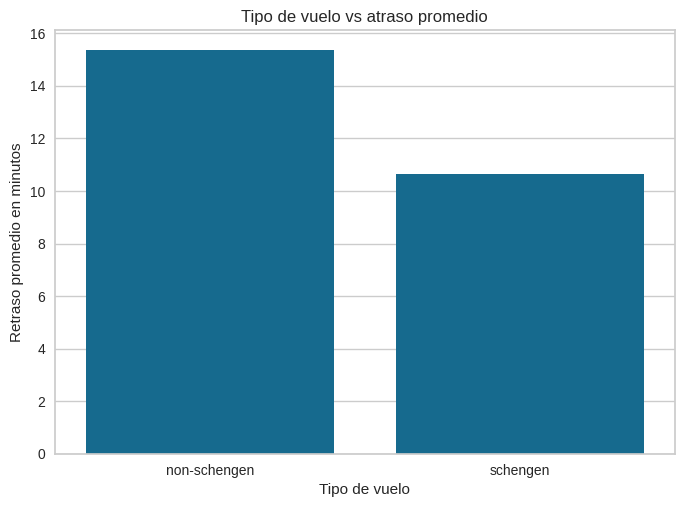

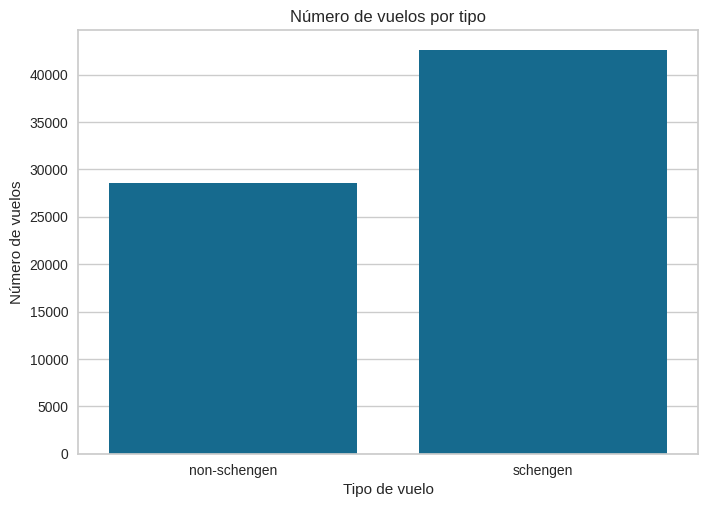

In [11]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

# vamos aver por aerolineas
sns.countplot(x='schengen', data=datos)
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

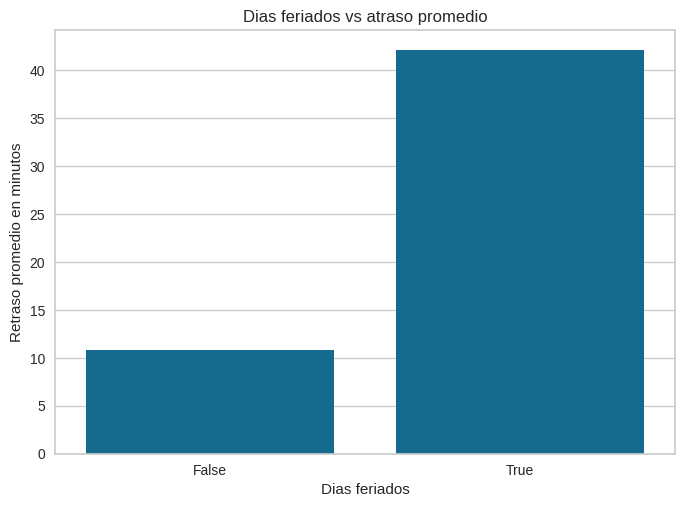

In [12]:
# dias feriados

avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Retraso promedio en minutos')
plt.show()


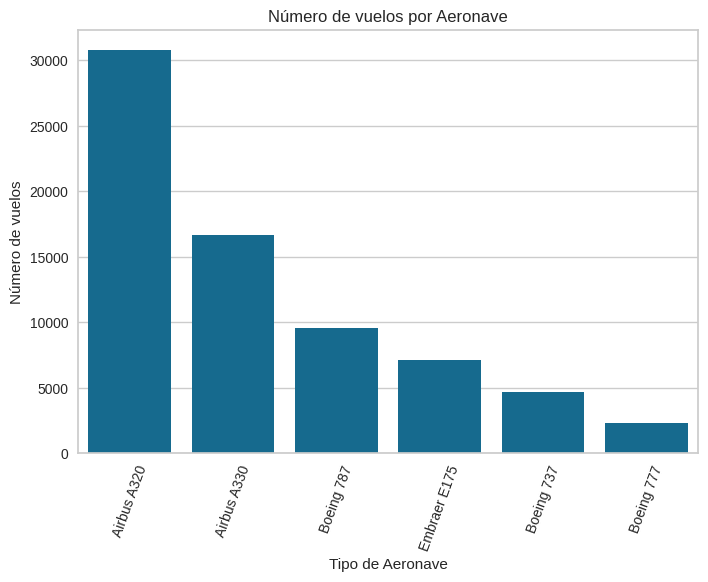

In [13]:
# cantidad de aeronoves
order = datos['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Número de vuelos por Aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

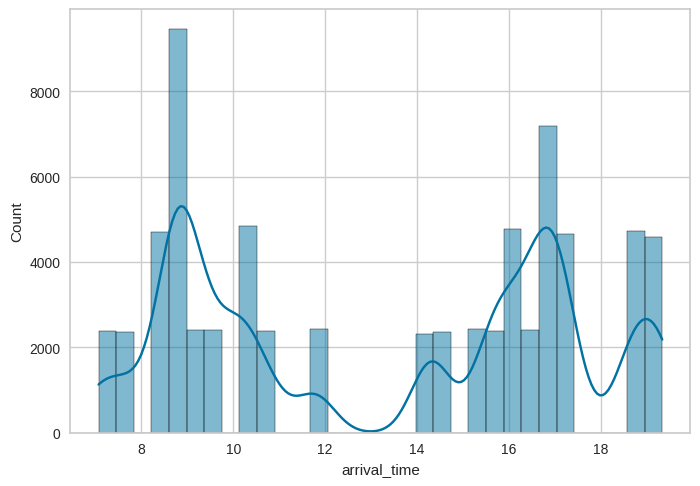

In [14]:
# histograma
sns.histplot(data=datos, x='arrival_time', kde=True)
plt.show()



In [15]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power((len(df[columna])),-1/3)
  return ancho

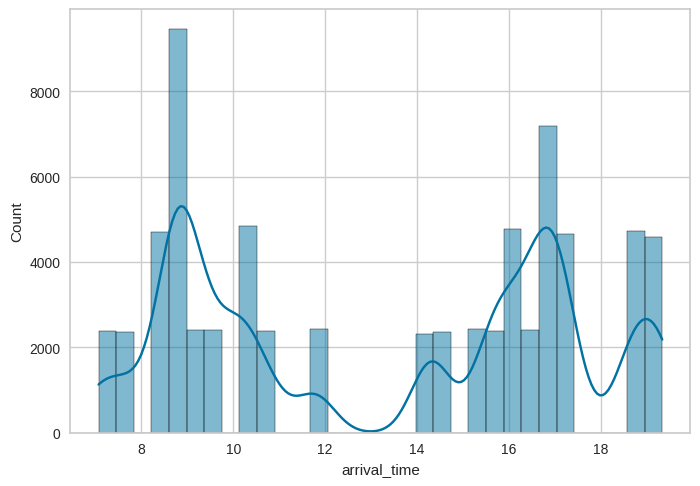

In [16]:
# crear variable

binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)
plt.show()

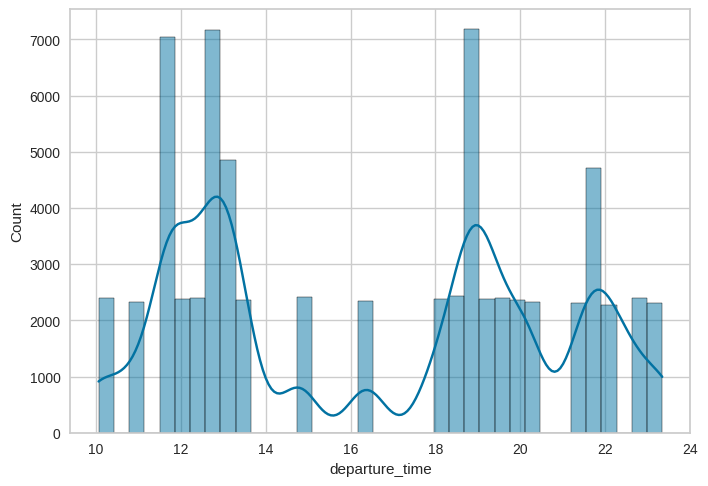

In [17]:
# varible hora de partidaa

binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)
plt.show()

In [18]:
# variable atraso promedio
atraso_promedio =datos['delay'].mean()
atraso_mediana = datos['delay'].median()

print(f'Atraso promedio: {atraso_promedio}')
print(f'Atraso mediana: {atraso_mediana}')

Atraso promedio: 12.548378015698628
Atraso mediana: 9.740453855590491


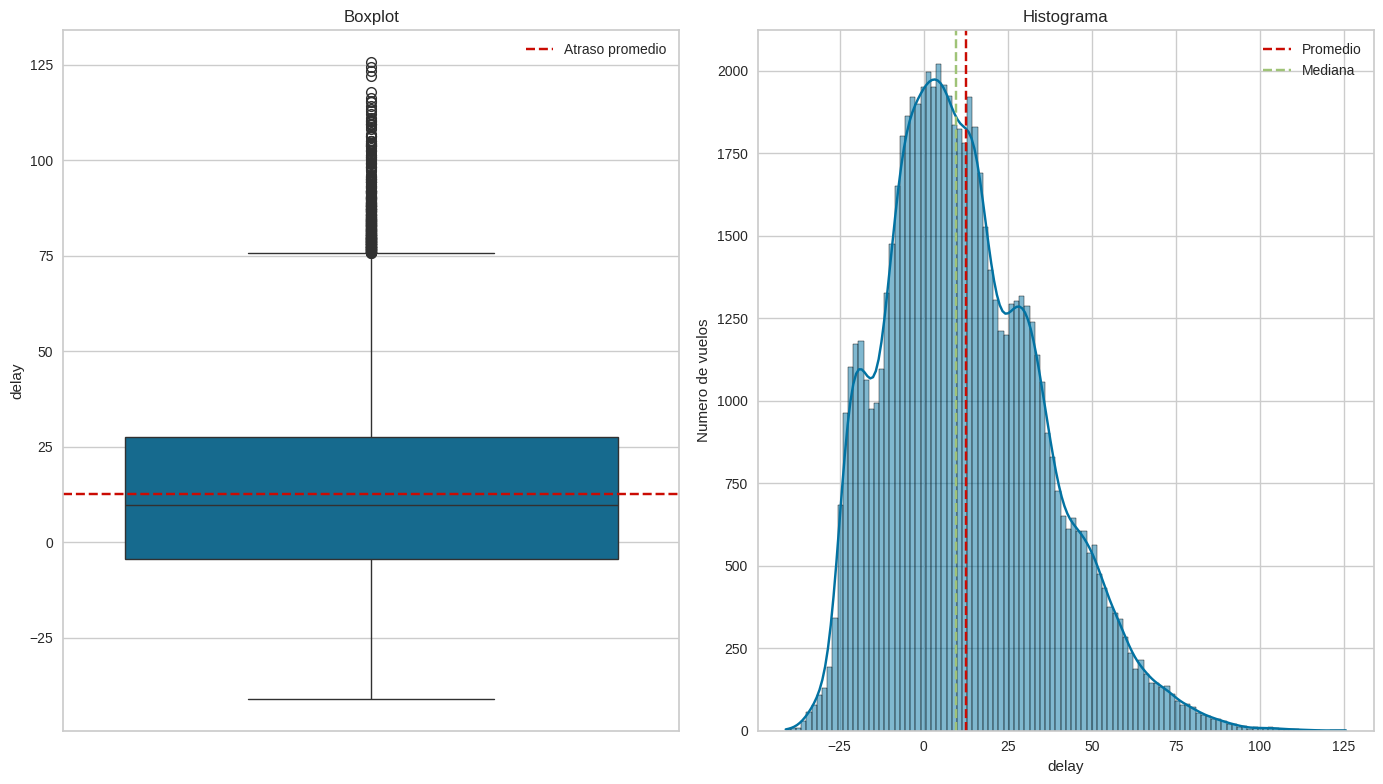

In [19]:
# haremos blotplot
fig, ax = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Atraso promedio')
#ax[0].axhline(y=atraso_mediana, color='g', linestyle='--', label='Atraso mediana')
ax[0].legend()

binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], binwidth=binwidth, kde=True)
plt.ylabel('Numero de vuelos')
plt.grid(True)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='g', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

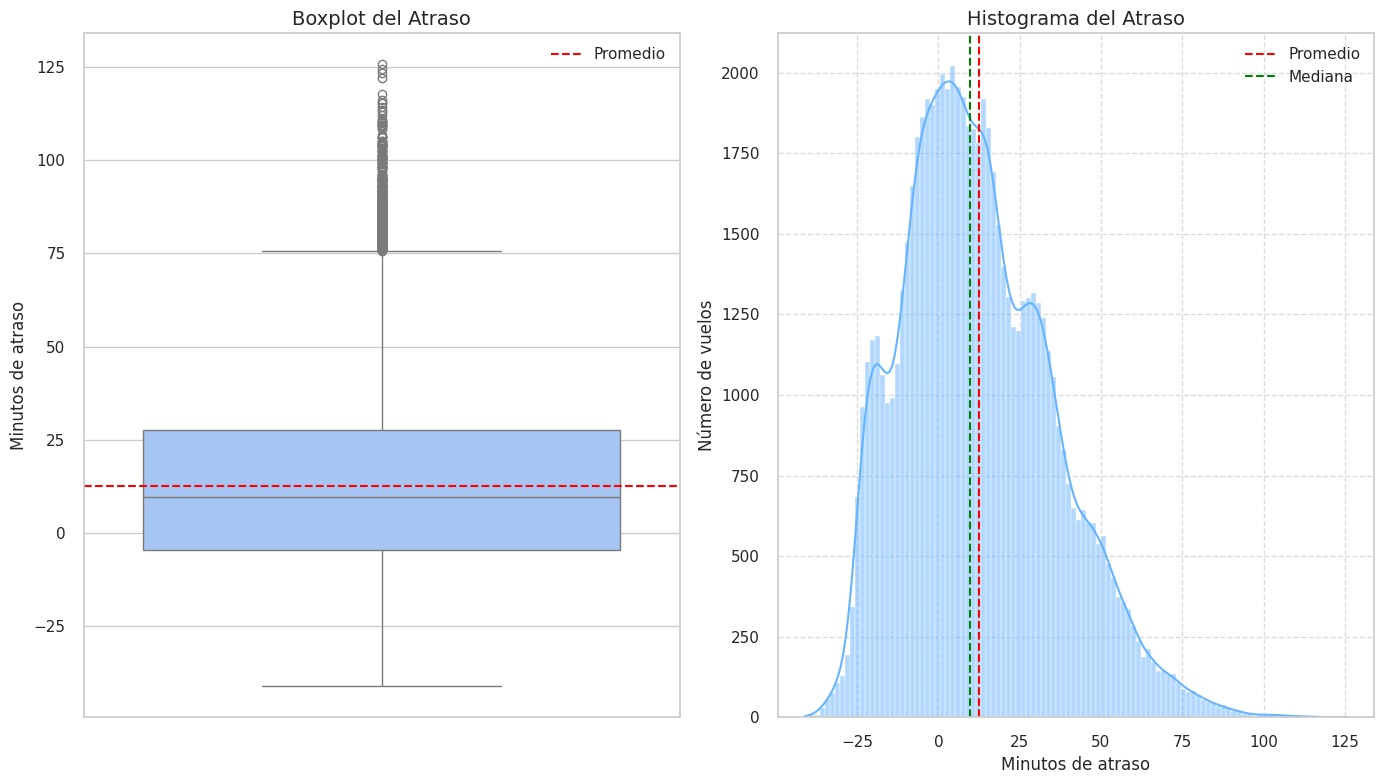

In [20]:

# Estilo claro y legible
sns.set_theme(style="whitegrid")

# Función para calcular ancho de bin (Regla de Freedman-Diaconis)
def ancho_bin(df, columna):
    q75, q25 = np.percentile(df[columna], [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(df[columna]))
    return bin_width

# Supongamos que tienes estos valores calculados:
# (Sustitúyelos con los reales si ya los tienes)
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

# Colores personalizados
color_box = '#99c2ff'     # azul claro
color_hist = '#66b3ff'    # azul intermedio
color_kde = '#3399ff'     # azul más fuerte
color_prom = 'red'
color_mediana = 'green'

# Crear figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Boxplot
sns.boxplot(data=datos, y='delay', ax=ax[0], color=color_box)
ax[0].set_title('Boxplot del Atraso', fontsize=14)
ax[0].axhline(y=atraso_promedio, color=color_prom, linestyle='--', label='Promedio')
# ax[0].axhline(y=atraso_mediana, color=color_mediana, linestyle='--', label='Mediana')  # opcional
ax[0].legend()
ax[0].set_ylabel('Minutos de atraso')
ax[0].set_xlabel('')

# Histograma
binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], binwidth=binwidth,
             kde=True, color=color_hist)  # sin kde_kws
ax[1].set_title('Histograma del Atraso', fontsize=14)
ax[1].set_xlabel('Minutos de atraso')
ax[1].set_ylabel('Número de vuelos')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].axvline(x=atraso_promedio, color=color_prom, linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color=color_mediana, linestyle='--', label='Mediana')
ax[1].legend()

# Ajustar espacio y mostrar
plt.tight_layout()
plt.show()

# <font color='#af7ac5'>**Class # 2**</h1>

In [21]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [22]:
# crear la columna fecha

datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [23]:
# crear una columna
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(7)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
44042,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,16,2018,False,-0.971954,2018-01-17,False,Wednesday
59878,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,341,2020,False,-6.591215,2020-12-07,False,Monday
3831,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,255,2010,False,33.485891,2010-09-13,False,Monday
9430,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,263,2011,False,-21.707524,2011-09-21,False,Wednesday
70334,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,308,2022,False,25.690267,2022-11-05,True,Saturday
34998,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,143,2016,False,-23.952957,2016-05-23,False,Monday
62075,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,123,2021,False,-2.530758,2021-05-04,False,Tuesday


### <font color='#cb4335'>**Seguimos teniendo mucha variables categoricas en el DataFrame Debemos dejar una sola**</h2>

In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

###  **que vamos a hacer pasar los datos a int para poder hacer el machine learning**

In [25]:
# iniciamos
pd.set_option('future.no_silent_downcasting', False)

datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1}).astype(int)
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1}).astype(int)
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1}).astype(int)

/tmp/ipython-input-25-1741951684.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1}).astype(int)
/tmp/ipython-input-25-1741951684.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1}).astype(int)
/tmp/ipython-input-25-1741951684.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `r

In [26]:
datos.sample(4)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
47648,10,YE,Airbus A320,0,TCY,8.939996,11.939996,256,2018,0,45.489714,2018-09-14,0,Friday
23164,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,84,2014,0,-7.471655,2014-03-26,0,Wednesday
20412,7,MM,Boeing 787,1,TZF,8.564949,13.564949,265,2013,0,40.663396,2013-09-23,0,Monday
5431,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,362,2010,0,-8.230198,2010-12-29,0,Wednesday


In [27]:
# varible categoricas
categoricas  = ['airline','aircraft_type','origin','day_name']

# para ceros y unos
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# nueva variable

datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
52248,15,0,16.571894,19.571894,198,2019,0,-7.164584,2019-07-18,0,...,0,0,0,0,0,0,0,1,0,0
14121,27,1,14.376052,16.376052,211,2012,0,4.709287,2012-07-30,0,...,0,0,0,0,1,0,0,0,0,0
9417,13,0,10.172731,13.172731,262,2011,0,-19.994561,2011-09-20,0,...,1,0,0,0,0,0,0,0,1,0
35339,10,0,8.939996,11.939996,165,2016,0,74.524078,2016-06-14,0,...,1,0,0,0,0,0,0,0,1,0
14795,19,1,16.245220,19.245220,256,2012,0,32.399491,2012-09-13,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
# usar metodo correlaciones

datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [30]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [31]:
# quitamos columnas no necesarias

df = datos_codificados.drop(columns=['year','day','date','flight_id','departure_time'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
67607,1,16.909690,0,20.492178,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48483,0,10.177197,0,0.839388,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
49631,1,16.245220,0,28.204912,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
23041,0,10.172731,0,9.813701,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
64002,0,16.718722,0,17.572991,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# <font color='#af7ac5'>**Class # 3**</h1>

### **usar esta biblioteca para regresiones y otras mas**

https://scikit-learn.org/stable/

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

X = df.drop(columns=['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# crear modelo

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [55]:
# evaluarlo

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# variable

y_pred_dummy = baseline.predict(X_test)

# funcion

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
        'RMSE': round(rmse**(1/2), 4),# PARA CUADRA LOS MINUTOS OJO
        'MAE': round(mae, 4),
        'R2': round(r2, 4)
    }
  return metricas

In [54]:
# variable

resultados_baseline = calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [57]:
# BOSQUE ALEATORIOS

from sklearn.ensemble import RandomForestRegressor

# crear modelo

modelo = RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}